# The Chicago Office of Police Accountability
The dataset in this research proposal is a list of complaints with the Chicago Police Department. It contains a number of different features for each complaint such as the date of the complaint, the race of the complainant, and the complaint category.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('copa-cases-by-complainant-or-subject.csv')
df.head()

,LOG_NO,COMPLAINT_DATE,ASSIGNMENT,CASE_TYPE,CURRENT_STATUS,CURRENT_CATEGORY,FINDING_CODE,POLICE_SHOOTING,BEAT,RACE_OF_COMPLAINANT,SEX_OF_COMPLAINANT,AGE_OF_COMPLAINANT,COMPLAINT_HOUR,COMPLAINT_DAY,COMPLAINT_MONTH
0,1092329,2019-01-12T10:44:54.000,BIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,7,1
1,1092328,2019-01-12T10:24:30.000,BIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,7,1
2,1092327,2019-01-11T22:30:46.000,BIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,6,1
3,1092326,2019-01-11T15:29:31.000,BIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,6,1
4,1092325,2019-01-11T15:18:16.000,COPA,Complaint,Pending Investigation,Excessive Force,NaN,No,1132,African American / Black,Female,40-49,15,6,1


The first thing that I want to see in this dataset if there is any pattern between the dates and the number of complaints.

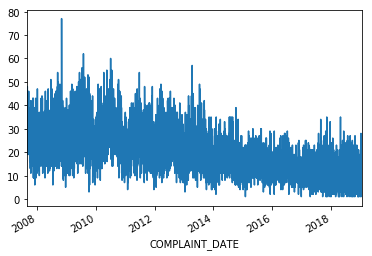

In [2]:
def get_date(x):
    return pd.to_datetime(str(x).split('T')[0])
df.index = df['COMPLAINT_DATE'].apply(get_date)
complaints_by_date = pd.DataFrame(df.groupby(df.index).count())
complaints_by_date['LOG_NO'].plot()
plt.show()

So, it looks like there is a repeating pattern, with the overall trend being a decrease in complaints. So in order to understand that repeating pattern, I am going to group the complaints by the month in which they occured to see if there is a repeating yearly pattern. 

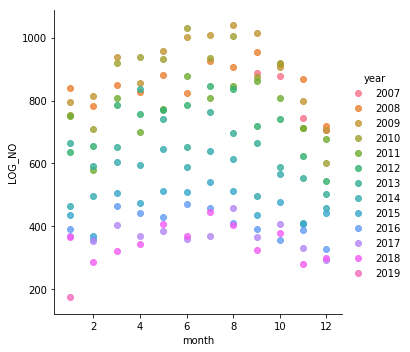

In [68]:
def get_year(x):
    return str(x)[:4]
df['Year'] = df['COMPLAINT_DATE'].apply(get_year)
complaints_by_month = pd.DataFrame(df.groupby(['Year', 'COMPLAINT_MONTH']).count())
complaints_by_month['month'] = complaints_by_month.index.get_level_values(1)
complaints_by_month['year'] = complaints_by_month.index.get_level_values(0)
complaints_by_month
g = sns.lmplot(data = complaints_by_month, x = 'month', y = 'LOG_NO', hue = 'year', fit_reg = False)
plt.show()

It looks like the number of complaints increases throughout the year until October and November and then decreases. This could be explained by a number of things, ranging from the varying amicability of police officers depending on the season to increased crime rates in the warmer months. Just for the sake of completeness, I'm also going to chart the number of complaints by weekday. Index one is Sunday and all the other days follow as you would expect.

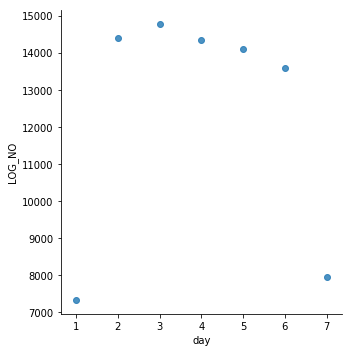

In [4]:
complaints_by_day = pd.DataFrame(df.groupby(['COMPLAINT_DAY']).count())
complaints_by_day['day'] = complaints_by_day.index
g = sns.lmplot(data = complaints_by_day, x = 'day', y = 'LOG_NO', fit_reg = False)
plt.show()

The next thing that I would like to investigate is the pattern for complaints by time broken down by the race of the complainant.

African American / Black


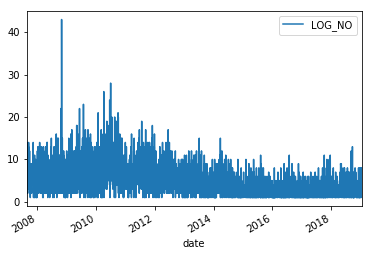

American Indian or Alaskan Native


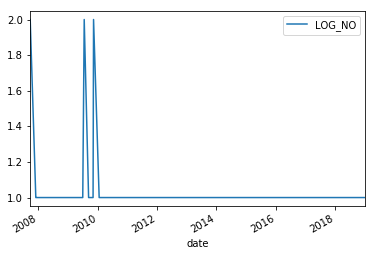

Asian or Pacific Islander


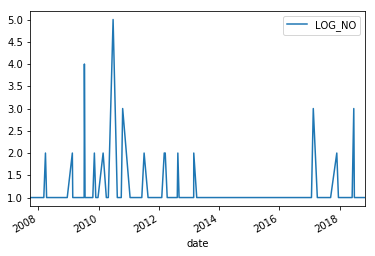

Hispanic


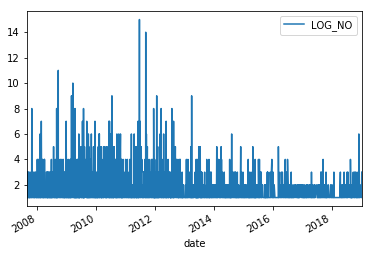

Unknown


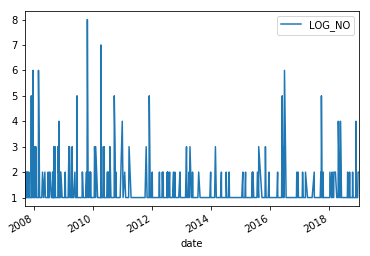

White


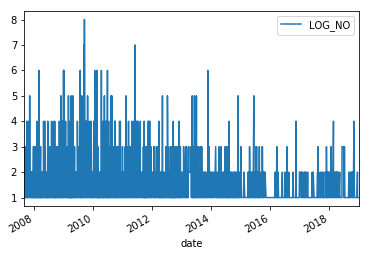

In [5]:
df['date'] = df.index
cdr = pd.DataFrame(df.groupby(['RACE_OF_COMPLAINANT', 'date']).count())
cdr = pd.DataFrame(cdr['LOG_NO'])
for race in cdr.index.get_level_values(0).unique():
    dataset = (cdr.loc[cdr.index.get_level_values(0) == race])
    dataset.index = dataset.index.get_level_values(1)
    print(race)
    dataset.plot()
    plt.show()

It doesn't seem like there is much variation between races in terms of the change over time. The next thing to investigate is the same pattern but broken down by complaint category instead of race.

Bias


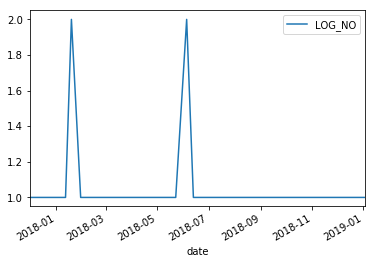

Civil Suits


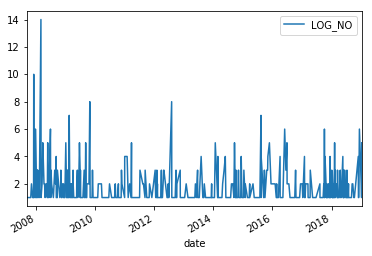

Coercion


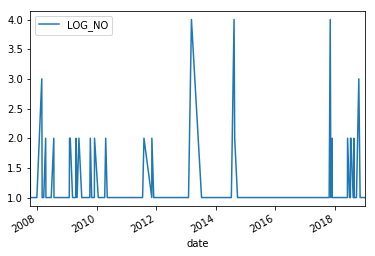

Death or Injury In Custody


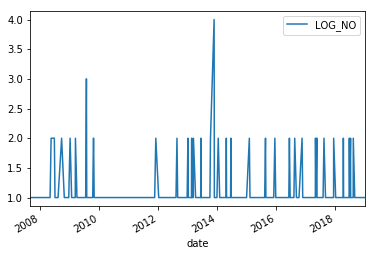

Domestic Violence


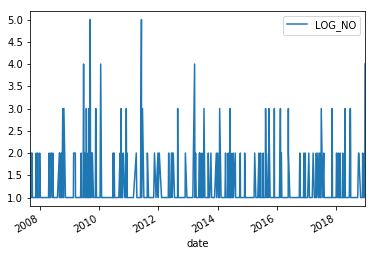

Excessive Force


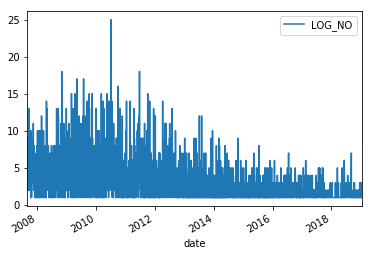

Firearm Discharge - Hits


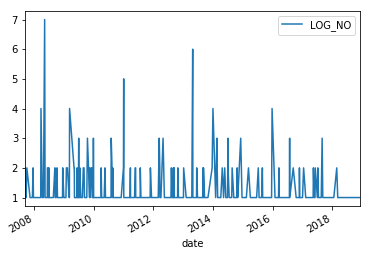

Firearm Discharge - No Hits


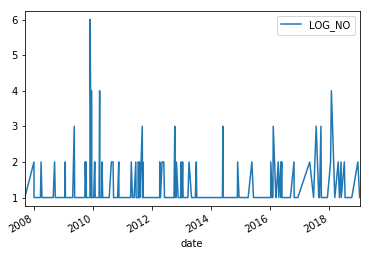

Firearm Discharge at Animal


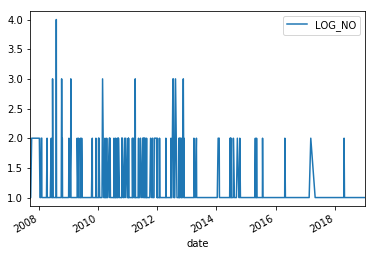

Legal Violation


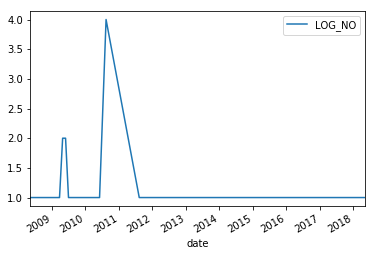

Miscellaneous


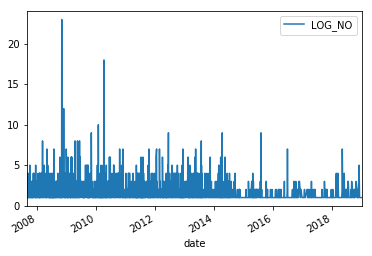

Motor Vehicle Related Death


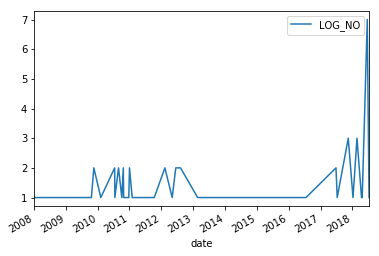

OC Discharge


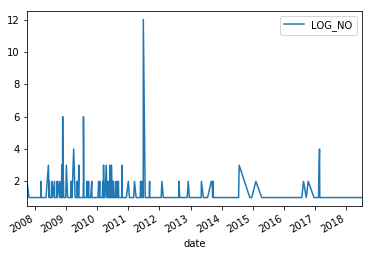

Operational Violation


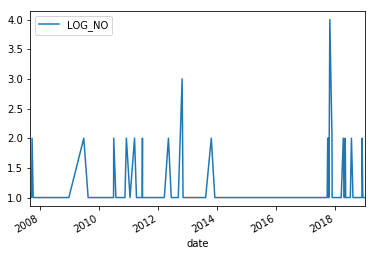

Search or Seizure


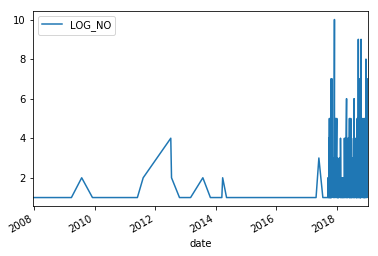

Taser Discharge


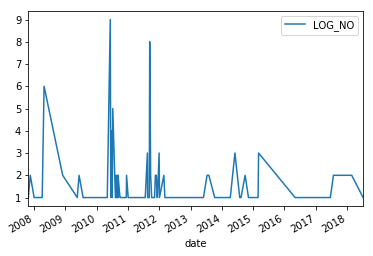

Taser Notification


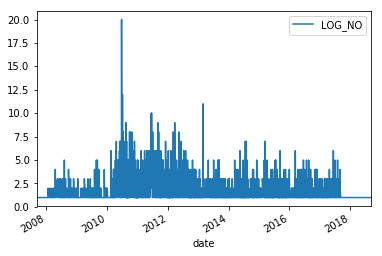

Unlawful Denial of Counsel


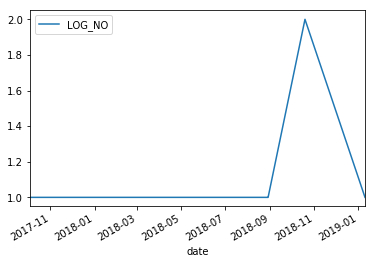

Unnecessary Display of Weapon


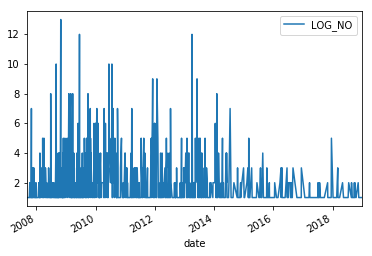

Verbal Abuse


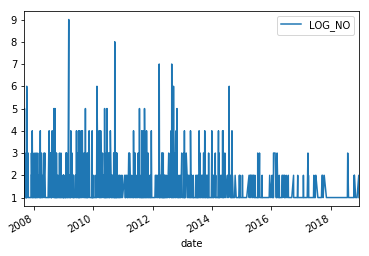

In [18]:
import math
df['date'] = df.index
cdr = pd.DataFrame(df.groupby(['CURRENT_CATEGORY', 'date']).count())
cdr = pd.DataFrame(cdr['LOG_NO'])
for race in cdr.index.get_level_values(0).unique():
    dataset = (cdr.loc[cdr.index.get_level_values(0) == race])
    dataset.index = dataset.index.get_level_values(1)
    print(race)
    dataset.plot()
    plt.show()

There does seem to be a fair amount of variability between the distributions of the different complaint types. Specifically, Motor Vehicle Related Death seems to spike toward the end of 2018 and Search or Seizure complaints are much more common in more recent years.

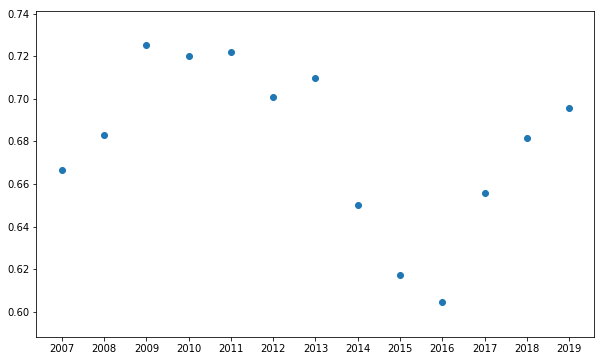

In [72]:
missing_category = df[df['CURRENT_CATEGORY'].isnull()]
plt.figure(figsize = (10,6))
years_reversed = missing_category['Year'].unique()
percentage = []
years = []
for x in range(len(years_reversed)):
    years.append(years_reversed[len(years_reversed)-x-1])
for year in missing_category['Year'].unique():
    percentage.append(len(missing_category.loc[missing_category['Year'] == year])/(len(df.loc[df['Year'] == year])))
plt.scatter(x = years, y = percentage)
plt.show()

## Hypothesis: Complainants do not give accurate data about the category of their complaints because they do not have good information.

My proposal is that when the complainants are filing their complaint with the Chicago Police Department, they would be given a list of the complaint types and descriptions of what each type means. This is because it seems like there is some overlap between the different complaint types and some of the names do not make it immediately apparent what that sorts of problems would fall under that category. As you can see in the graph above, there is a high percentage of null values and it does not seem like there has been any progress made toward increasing the number of complainants who supply good information.

## Rollout Plan:

Two versions of the form would be issued randomly to complainants, one with the additional information about complaint types and the same form as is currently being used. Initially, it might be prudent to only issue the new form to ten percent of the complainants to ensure that there are no issues during the initial testing. But, after the initial trial period, a fifty-fifty split would be helpful to get a good amount of data on both form types over the same time period.

## Evaluation Plan:

After the data is collected, the experiment would be declared a success if there was a statistically significant improvement in the number of relevant responses from those who recieved the new form.